20 - Introduction to image processing using scikit-image in Python
1.  resize
2.  edge detection
3.  deconvolution
4.  entropy

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
path = r'/content/gdrive/My Drive/Colab Notebooks/screeni_practice'
os.chdir( path )

Mounted at /content/gdrive


In [ ]:
import skimage
from skimage import io
from matplotlib import pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.filters import roberts, sobel, scharr, prewitt, try_all_threshold, threshold_otsu
from skimage.feature import canny
from skimage import restoration
import numpy as np
import scipy.stats as st
from skimage.filters.rank import entropy
from skimage.morphology import disk

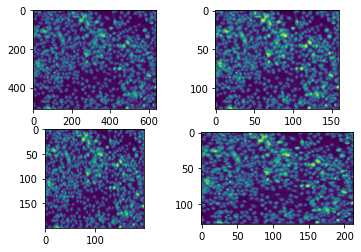

In [ ]:
img = io.imread('images/test_image.jpg', as_gray=True)
rescaled_img = rescale(img, 1.0/4.0, anti_aliasing=True)
resized_img = resize(img, (200,200))
downscaled_img = downscale_local_mean(img, (4,3))

plt.subplot(2,2,1)
plt.imshow(img)
plt.subplot(2,2,2)
plt.imshow(rescaled_img)
plt.subplot(2,2,3)
plt.imshow(resized_img)
plt.subplot(2,2,4)
plt.imshow(downscaled_img)

In [ ]:
img = io.imread('images/test_image_cropped.jpg', as_gray=True)
print(img.shape)

(300, 300)


<function matplotlib.pyplot.show(close=None, block=None)>

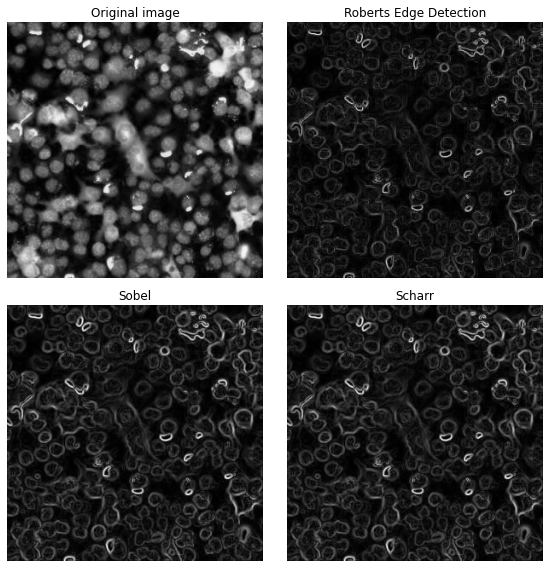

In [ ]:
edge_roberts = roberts(img)
edge_sobel = sobel(img)
edge_scharr = scharr(img)
edge_prewitt = prewitt(img)

# plt.imshow(edge_roberts, cmap='gray')

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,8))

ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(edge_roberts, cmap=plt.cm.gray)
ax[1].set_title('Roberts Edge Detection')

ax[2].imshow(edge_sobel, cmap=plt.cm.gray)
ax[2].set_title('Sobel')

ax[3].imshow(edge_scharr, cmap=plt.cm.gray)
ax[3].set_title('Scharr')

for a in ax:
  a.axis('off')

plt.tight_layout()
plt.show

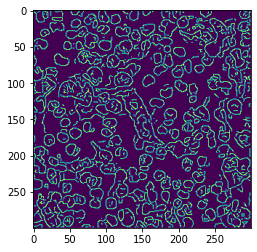

In [ ]:
edge_canny = canny(img, sigma=1)
plt.imshow(edge_canny)

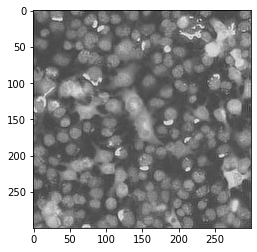

In [ ]:
psf = np.ones((3,3))/9

deconvolved, _ = restoration.unsupervised_wiener(img, psf)
plt.imsave('images/deconvolved.jpg', deconvolved, cmap='gray')

img2 = io.imread('images/deconvolved.jpg')
plt.imshow(img2)

[[0.00120229 0.00828598 0.01569749 0.00828598 0.00120229]
 [0.00828598 0.05710569 0.10818462 0.05710569 0.00828598]
 [0.01569749 0.10818462 0.20495178 0.10818462 0.01569749]
 [0.00828598 0.05710569 0.10818462 0.05710569 0.00828598]
 [0.00120229 0.00828598 0.01569749 0.00828598 0.00120229]]


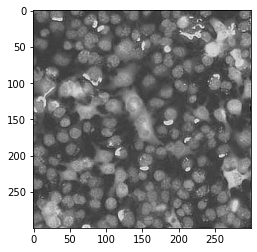

In [ ]:
def gkern(kernlen=21, nsig=2):
  lim = kernlen/2 + (kernlen % 2)/2
  x = np.linspace(-lim, lim, kernlen+1)
  kern1d = np.diff(st.norm.cdf(x))
  kern2d = np.outer(kern1d, kern1d)
  return kern2d/kern2d.sum()

psf = gkern(5,3)
print(psf)

deconvolved, _ = restoration.unsupervised_wiener(img, psf)
plt.imsave('images/deconvolved.jpg', deconvolved, cmap='gray')

img2 = io.imread('images/deconvolved.jpg')
plt.imshow(img2)

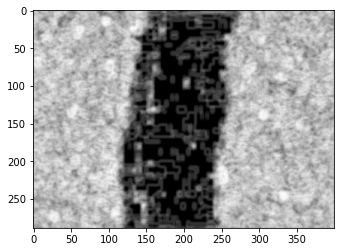

In [ ]:
img = io.imread('images/scratch.jpg')
entr_img = entropy(img, disk(3))
plt.imshow(entr_img, cmap='gray')

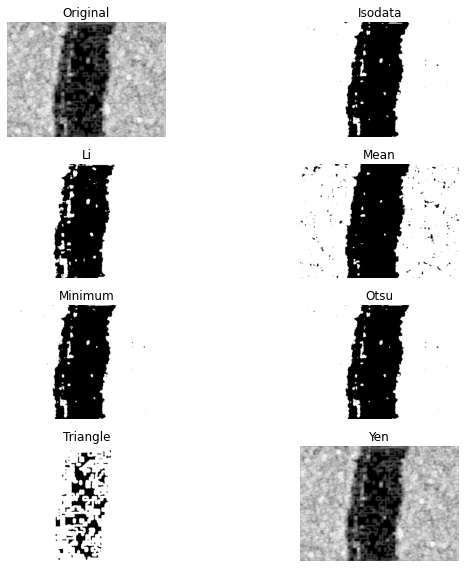

In [ ]:
fig, ax = try_all_threshold(entr_img, figsize=(10,8), verbose=False)
plt.imshow(entr_img, cmap='gray')

The percent bright pixels is: 28.91522491349481


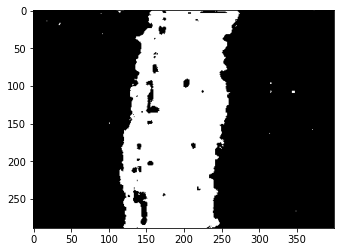

In [ ]:
thresh = threshold_otsu(entr_img)

binary = entr_img <= thresh
plt.imshow(binary, cmap='gray')
print('The percent bright pixels is:', (np.sum(binary==1)*100/((np.sum(binary==1)+(np.sum(binary==0))))))